In [11]:
from tvDatafeed import TvDatafeed, Interval
import csv
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def login_tv(user='', password=''):
    if (user != '' & password != ''):
        tv = TvDatafeed(user, password)
    else:
        tv = TvDatafeed()
    return tv


def get_daily_stock(symbol='PTT', exchange='SET', interval=Interval.in_daily, tv=TvDatafeed()):
    data_daily = tv.get_hist(
        symbol=symbol, 
        exchange=exchange, 
        interval=interval,
        n_bars=5442
        )
    return data_daily

TimeFrames = [
    "Interval.in_1_minute"
    ,"Interval.in_3_minute"
    ,"Interval.in_5_minute"
    ,"Interval.in_15_minute"
    ,"Interval.in_30_minute"
    ,"Interval.in_45_minute"
    ,"Interval.in_1_hour"
    ,"Interval.in_2_hour"
    ,"Interval.in_3_hour"
    ,"Interval.in_4_hour"
    ,"Interval.in_daily"
    ,"Interval.in_weekly"
    ,"Interval.in_monthly"
]
df = pd.DataFrame(columns=['datetime', 'symbol','open','high','low','close','volume', 'TimeFrame'])

def get_df_daily_stock(TimeFrame=Interval.in_daily, csv_path='./symbols_and_exchanges.csv', df=df, tv=TvDatafeed(), save=False):
    with open(csv_path, 'r') as csvfile:
        datareader = csv.reader(csvfile)
        for idx, row in enumerate(datareader):
            if idx >0:
                print(row, TimeFrame)
                data = get_daily_stock(symbol=row[0], exchange=row[1], tv=tv, interval=TimeFrame)
                data['TimeFrame']=str(Interval.in_1_minute).split('.in_')[-1]
                data.reset_index(inplace=True)
                df = df.append(data, ignore_index=True)
    df.dropna()
    if save:
        df.to_csv(r'df_all_timeframe.csv', index=False)
    return df, data


## assert None return
data = get_daily_stock(symbol='aaalksangkjbrjg')
if data is None:
    print('data is None')

ERROR:tvDatafeed.main:The read operation timed out
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


data is None


In [48]:
done_symbol = [0] * len(TimeFrames)
done_symbol

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
test = "Interval.in_5_minute"

eval(test)

<Interval.in_5_minute: '5'>

In [1]:
TimeFrames = [
    "Interval.in_1_minute"
    ,"Interval.in_3_minute"
    ,"Interval.in_5_minute"
    ,"Interval.in_15_minute"
    ,"Interval.in_30_minute"
    ,"Interval.in_45_minute"
    ,"Interval.in_1_hour"
    ,"Interval.in_2_hour"
    ,"Interval.in_3_hour"
    ,"Interval.in_4_hour"
    ,"Interval.in_daily"
    ,"Interval.in_weekly"
    ,"Interval.in_monthly"
]

tmp = ['symbol'] + TimeFrames
print(len(tmp))

14


In [51]:
import os 
current_idx_path = 'current_idx.csv'
if not os.path.exists(current_idx_path):
    with open(current_idx_path, 'w', newline='') as csvfile:
        pass


In [2]:
# SELECT TABLE Program_Trading_SET_and_Mai >>> PRINT VALUES

import mysql.connector

conn = mysql.connector.connect(
    host = 'ideatrade.serveftp.net',
    user = 'Sura@view',
    password = 'ZP6HpF-T04CGw_t(',
    database = 'db_ideatrade',
    port = 51410
    )

# Create a cursor object using the cursor() method
cursor = conn.cursor()

# Define the table name with spaces
table_name = "allsymbol_global"

# Define your SQL query to select all rows from the table
select_query = """
        # SELECT Symbol, Exchange 
        SELECT * 
        FROM `{}` 
        # LIMIT 10
    """.format(table_name)

# Execute the query
cursor.execute(select_query)

# Fetch all rows
head = cursor.description
print('head: ',[head_info[0] for head_info in head])
rows = cursor.fetchall()

# Close cursor and connection
cursor.close()
conn.close()

##################################

import csv

def convert_to_csv(data, filename):
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['id', 'Symbol', 'full_name', 'VWAP', 'Price', 'Exchange', 'Country', 'Sector'])
        # csv_writer.writerow(['symbol', 'exchange'])  # Write header
        csv_writer.writerows(data)

# Sample list of tuples
data = [
    ('AAPL', 'NASDAQ'),
    ('GOOGL', 'NASDAQ'),
    ('MSFT', 'NASDAQ'),
    ('AMZN', 'NASDAQ'),
    ('TSLA', 'NASDAQ')
]

filename = "symbols_and_exchanges_new.csv"
convert_to_csv(rows, filename)
print(f"CSV file '{filename}' has been created.")



head:  ['id', 'Symbol', 'full_name', 'VWAP', 'Price', 'Exchange', 'Country', 'Sector']
CSV file 'symbols_and_exchanges_new.csv' has been created.


In [5]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("symbols_and_exchanges_new.csv")

# Get unique values in the 'Country' column and their counts
country_counts = df['Country'].value_counts()

# Display the unique countries and their counts
print("Unique countries and their counts:")
print(country_counts)

Unique countries and their counts:
United States    19348
Canada           10176
China             7563
Japan             6610
India             6559
                 ...  
Albania              1
Myanmar              1
Jamaica              1
Montenegro           1
Cameroon             1
Name: Country, Length: 117, dtype: int64


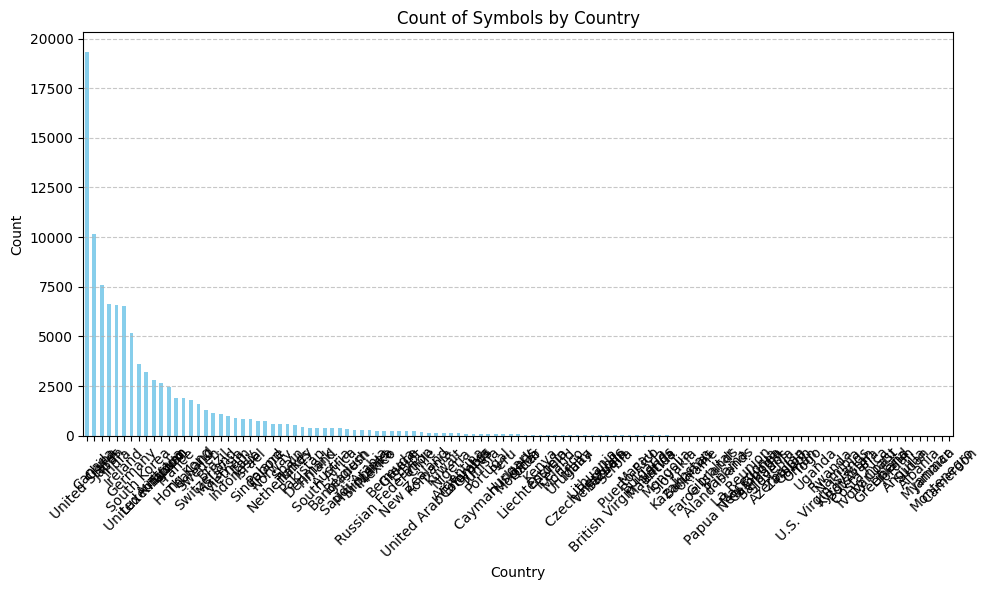

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("symbols_and_exchanges_new.csv")

# Get unique values in the 'Country' column and their counts
country_counts = df['Country'].value_counts()

# Plot a vertical bar plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Symbols by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


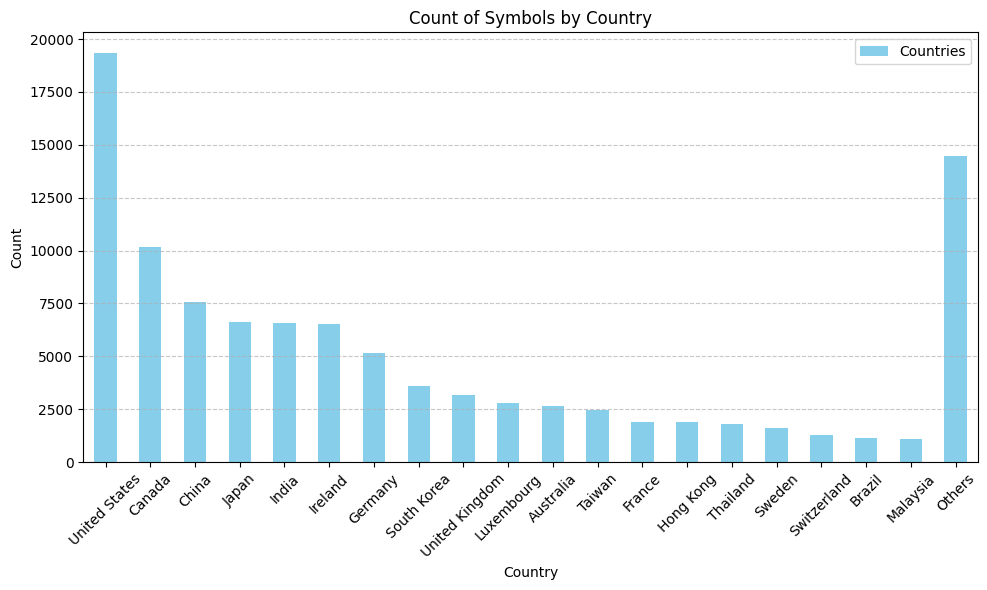

List of all countries and their counts, including 'Others':
[('United States', 19348), ('Canada', 10176), ('China', 7563), ('Japan', 6610), ('India', 6559), ('Ireland', 6528), ('Germany', 5147), ('South Korea', 3609), ('United Kingdom', 3181), ('Luxembourg', 2801), ('Australia', 2633), ('Taiwan', 2474), ('France', 1917), ('Hong Kong', 1911), ('Thailand', 1780), ('Sweden', 1612), ('Switzerland', 1281), ('Brazil', 1134), ('Malaysia', 1100), ('Vietnam', 972), ('Indonesia', 907), ('Italy', 823), ('Israel', 818), ('Singapore', 741), ('Poland', 714), ('Norway', 611), ('Netherlands', 584), ('Spain', 572), ('Turkey', 551), ('Pakistan', 416), ('Denmark', 406), ('Finland', 399), ('South Africa', 398), ('Austria', 379), ('Bangladesh', 363), ('Belgium', 322), ('Saudi Arabia', 307), ('Philippines', 303), ('Sri Lanka', 288), ('Mexico', 254), ('Russian Federation', 251), ('Bermuda', 248), ('Greece', 246), ('Egypt', 240), ('New Zealand', 237), ('Chile', 160), ('Romania', 157), ('United Arab Emirates',

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("symbols_and_exchanges_new.csv")

# Get unique values in the 'Country' column and their counts
country_counts = df['Country'].value_counts()

# Save all countries and their counts to a dictionary
all_countries_counts = country_counts.to_dict()

# Group countries with counts less than 1000 into an "Others" category
threshold = 1000
small_countries = country_counts[country_counts < threshold]
others_count = small_countries.sum()
country_counts = country_counts[country_counts >= threshold]
country_counts['Others'] = others_count

# Add the count of "Others" to the dictionary
all_countries_counts['Others'] = others_count

# Plot a vertical bar plot including "Others"
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue', label='Countries')
plt.title('Count of Symbols by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Save all countries, including "Others," and their counts to a list
all_countries_with_counts = [(country, count) for country, count in all_countries_counts.items()]

print("List of all countries and their counts, including 'Others':")
print(all_countries_with_counts)

In [35]:
country_timezones = {
    'United States': 'America',
    'Canada': 'America',
    'China': 'Asia',
    'Japan': 'Asia',
    'India': 'Asia',
    'Ireland': 'Europe',
    'Germany': 'Europe',
    'South Korea': 'Asia',
    'United Kingdom': 'Europe',
    'Luxembourg': 'Europe',
    'Australia': 'Australia',
    'Taiwan': 'Asia',
    'France': 'Europe',
    'Hong Kong': 'Asia',
    'Thailand': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Brazil': 'America',
    'Malaysia': 'Asia',
    'Vietnam': 'Asia',
    'Indonesia': 'Asia',
    'Italy': 'Europe',
    'Israel': 'Asia',
    'Singapore': 'Asia',
    'Poland': 'Europe',
    'Norway': 'Europe',
    'Netherlands': 'Europe',
    'Spain': 'Europe',
    'Turkey': 'Europe',
    'Pakistan': 'Asia',
    'Denmark': 'Europe',
    'Finland': 'Europe',
    'South Africa': 'Africa',
    'Austria': 'Europe',
    'Bangladesh': 'Asia',
    'Belgium': 'Europe',
    'Saudi Arabia': 'Asia',
    'Philippines': 'Asia',
    'Sri Lanka': 'Asia',
    'Mexico': 'America',
    'Russian Federation': 'Europe',
    'Bermuda': 'Atlantic',
    'Greece': 'Europe',
    'Egypt': 'Africa',
    'New Zealand': 'Pacific',
    'Chile': 'America',
    'Romania': 'Europe',
    'United Arab Emirates': 'Asia',
    'Kuwait': 'Asia',
    'Nigeria': 'Africa',
    'Argentina': 'America',
    'Colombia': 'America',
    'Cyprus': 'Asia',
    'Tunisia': 'Africa',
    'Portugal': 'Europe',
    'Cayman Islands': 'America',
    'Peru': 'America',
    'Hungary': 'Europe',
    'Morocco': 'Africa',
    'Qatar': 'Asia',
    'Liechtenstein': 'Europe',
    'Kenya': 'Africa',
    'Estonia': 'Europe',
    'Iceland': 'Atlantic',
    'Monaco': 'Europe',
    'Uruguay': 'America',
    'Malta': 'Europe',
    'Czech Republic': 'Europe',
    'Lithuania': 'Europe',
    'Venezuela': 'America',
    'Bahrain': 'Asia',
    'Serbia': 'Europe',
    'British Virgin Islands': 'America',
    'Puerto Rico': 'America',
    'Macau': 'Asia',
    'Bulgaria': 'Europe',
    'Mauritius': 'Indian',
    'Latvia': 'Europe',
    'Mongolia': 'Asia',
    'Slovakia': 'Europe',
    'Kazakhstan': 'Asia',
    'Bahamas': 'America',
    'Ukraine': 'Europe',
    'Faroe Islands': 'Atlantic',
    'Gibraltar': 'Europe',
    'Aland Islands': 'Europe',
    'Panama': 'America',
    'Papua New Guinea': 'Pacific',
    'La Reunion': 'Indian',
    'Macedonia': 'Europe',
    'Cambodia': 'Asia',
    'Barbados': 'America',
    'Slovenia': 'Europe',
    'Azerbaijan': 'Asia',
    'Zambia': 'Africa',
    'Gabon': 'Africa',
    'Oman': 'Asia',
    'Togo': 'Africa',
    'Uganda': 'Africa',
    'U.S. Virgin Islands': 'America',
    'Rwanda': 'Africa',
    'Namibia': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Botswana': 'Africa',
    'Costa Rica': 'America',
    'Ivory Coast': 'Africa',
    'Vanuatu': 'Pacific',
    'Greenland': 'America',
    'Liberia': 'Africa',
    'Jordan': 'Asia',
    'Anguilla': 'America',
    'Sudan': 'Africa',
    'Albania': 'Europe',
    'Myanmar': 'Asia',
    'Jamaica': 'America',
    'Montenegro': 'Europe',
    'Cameroon': 'Africa',
}


In [36]:
import pandas as pd
from collections import defaultdict

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("symbols_and_exchanges_new.csv")

# Reverse the country_timezones dictionary to create a timezone_countries dictionary
timezone_countries = defaultdict(list)
for country, timezone in country_timezones.items():
    timezone_countries[timezone].append(country)
# Initialize a dictionary to store the count of countries in each timezone
timezone_counts = {timezone: 0 for timezone in timezone_countries.keys()}
# Iterate over each country in the DataFrame and count the countries in each timezone
for country in df['Country']:
    timezone = country_timezones.get(country, 'Unknown')  # Get the timezone for the country
    if timezone == 'Unknown': continue
    else:    timezone_counts[timezone] += 1  # Increment the count for the timezone

# Print the count of countries in each timezone
for timezone, count in timezone_counts.items():
    print(f"Timezone: {timezone}, Count: {count}")




Timezone: America, Count: 31530
Timezone: Asia, Count: 37218
Timezone: Europe, Count: 28925
Timezone: Australia, Count: 2633
Timezone: Africa, Count: 977
Timezone: Atlantic, Count: 290
Timezone: Pacific, Count: 242
Timezone: Indian, Count: 17


In [41]:
import pandas as pd
import os

# Create a folder named 'index_symbol' if it doesn't exist
folder_name = 'index_symbol'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("symbols_and_exchanges_new.csv")

# Add a new 'timezone' column to the DataFrame based on the country-timezone mapping
df['timezone'] = df['Country'].map(country_timezones)

# Separate each timezone into separate CSV files
for timezone in df['timezone'].unique():
    # Filter the DataFrame based on the current timezone
    timezone_df = df[df['timezone'] == timezone]
    # Remove the 'timezone' column
    timezone_df.drop(columns=['timezone'], inplace=True)
    # Save the filtered DataFrame to a CSV file with the timezone name suffixed
    file_path = os.path.join(folder_name, f"symbols_and_exchanges_{timezone}.csv")
    timezone_df.to_csv(file_path, index=False)

C:\Users\teera\AppData\Local\Temp\ipykernel_2676\4096300219.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timezone_df.drop(columns=['timezone'], inplace=True)
C:\Users\teera\AppData\Local\Temp\ipykernel_2676\4096300219.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timezone_df.drop(columns=['timezone'], inplace=True)
C:\Users\teera\AppData\Local\Temp\ipykernel_2676\4096300219.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [39]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("symbols_and_exchanges_new.csv")

# Separate each timezone into separate CSV files
for timezone in df['timezone'].unique():
    # Filter the DataFrame based on the current timezone
    timezone_df = df[df['timezone'] == timezone]
    # Save the filtered DataFrame to a CSV file with the timezone name suffixed
    timezone_df.to_csv(f"symbols_and_exchanges_{timezone}.csv", index=False)

In [47]:
import os
import pandas as pd

# Function to split a DataFrame into chunks of 5000 rows each
def split_dataframe(df):
    chunk_size = 5500
    num_chunks = len(df) // chunk_size + (len(df) % chunk_size > 0)
    chunks = [df[i*chunk_size:(i+1)*chunk_size] for i in range(num_chunks)]
    # Combine the last two chunks if the last chunk has fewer than 5000 samples
    if len(chunks) > 1 and len(chunks[-1]) < chunk_size:
        combined_chunk = pd.concat(chunks[-2:], ignore_index=True)
        return chunks[:-2] + [combined_chunk]
    return chunks

# Function to save each DataFrame chunk to a separate CSV file with a running number suffix
def save_dataframe_chunks(dataframes, folder_path, file_name):
    for i, df_chunk in enumerate(dataframes):
        file_path = os.path.join(folder_path, f"{file_name}_{i+1}.csv")
        df_chunk.to_csv(file_path, index=False)

# Folder containing the CSV files
input_folder_path = "index_symbol"
# New folder to save the combined splits
output_folder_path = "index_symbol_vm"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Iterate over each CSV file in the input folder
for file_name in os.listdir(input_folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # Split the DataFrame into chunks of 5000 rows each
        dataframe_chunks = split_dataframe(df)
        
        # Save each chunk to a separate CSV file with a running number suffix in the output folder
        save_dataframe_chunks(dataframe_chunks, output_folder_path, file_name[:-4])  # Remove '.csv' extension


In [50]:
import os
import shutil

# Function to create a new VM folder and copy files
def create_vm_folder(vm_number, csv_file, source_file, vm_folder):
    os.makedirs(vm_folder, exist_ok=True)
    renamed_csv_file = os.path.join(vm_folder, "symbols_and_exchanges.csv")
    shutil.copy(csv_file, renamed_csv_file)
    shutil.copy(source_file, vm_folder)
    with open(os.path.join(vm_folder, "README.md"), 'w') as readme_file:
        readme_file.write(f"# VM {vm_number}\n\n")
        readme_file.write(f"CSV Sample File: {csv_file}\n")

# Folder containing the CSV files
input_folder_path = "index_symbol_vm"
# Source file to copy to VM folders
source_file = "get_all_timeframe.py"
# Output folder for VMs
output_folder_path = "VMs"

# Create the output folder for VMs if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Iterate over each CSV file in the input folder
for idx, file_name in enumerate(os.listdir(input_folder_path), start=1):
    if file_name.endswith(".csv"):
        csv_file = os.path.join(input_folder_path, file_name)
        # Create a new VM folder for each CSV file
        vm_folder = os.path.join(output_folder_path, f"VM_{idx}")
        create_vm_folder(idx, csv_file, source_file, vm_folder)


In [43]:
with open('./symbols_and_exchanges.csv', 'r') as csvfile:
    row_count = sum(1 for row in csv.reader(csvfile))

print("Total number of rows:", row_count)

Total number of rows: 105849


In [5]:
print(105849   * 14    *   2     / 60 / 60,' hours')
# symbol, TimeFrame, 2seconds each,  

823.27  hours
